# chapter_14_합성곱_신경망을_사용한_컴퓨터_비전

□ Convolutional Neural Networks(CNN) 등장 배경
- "인간은 강아지를 어떻게 인식하고 있는지 설명하기 어렵다. 이를 이해하려면 감각 기관의 작동원리를 알아야한다."
- **컴퓨터의 인식 문제**:
  - 1996년 Deep Blue는 체스 세계 챔피언을 이겼으나, 단순한 시각 인식은 최근까지도 어려웠음.
- **시각 인식 문제**:
  - 인간은 고수준의 감각 정보를 의식적으로 처리하지 않음.
  - 시각/청각 등 감각 모듈이 복잡한 정보를 처리 후 의식에 전달.
  - 단순해 보이는 인식 작업도 매우 복잡함.

□ CNN의 등장
- CNN은 **뇌의 시각 피질 연구**에서 영감을 받아 개발.
- **1980년대부터 이미지 인식**에 사용되었으나, 초기 성능은 제한적.

□ CNN의 급격한 발전 요인
- **계산 능력 향상**:
  - GPU 및 분산 컴퓨팅의 발전.
- **데이터의 증가**:
  - 대규모 이미지 데이터셋의 가용성.
- **딥러닝 트레이닝 기법**:
  - 딥러닝 네트워크 학습을 위한 최신 기술 등장.

□ CNN의 활용
- **시각 인식**:
  - 이미지 검색, 자율주행차, 자동 비디오 분류 시스템 등에서 활용.
- **다른 분야**:
  - 음성 인식, 자연어 처리 등의 다양한 영역에서도 성공적.

□ CNN의 주요 시각적 응용
- **객체 감지(Object Detection)**:
  - 이미지 내 여러 객체를 분류하고, 경계 상자 설정.
- **의미론적 분할(Semantic Segmentation)**:
  - 이미지의 각 픽셀을 해당 객체의 클래스로 분류.

□ chapter 14 주요 내용
- **CNN 구조 및 구성 요소** 분석.
- **TensorFlow와 Keras**를 사용한 CNN 구현.
- **최신 CNN 아키텍처** 소개 및 시각적 응용 탐구.

# 14.1 시각 피질 구조

□ 시각 피질의 구조
- **연구자**: David H. Hubel과 Torsten Wiesel의 1958년, 1959년 실험.
- **연구 대상**: 고양이와 원숭이의 시각 피질.
- **성과**: 1981년 생리의학 노벨상 수상.
- **핵심 발견**: 시각 피질에서 뉴런들이 제한된 시각 영역의 자극에만 반응함.

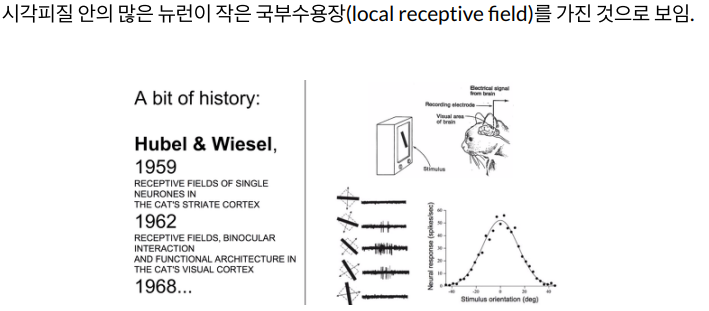

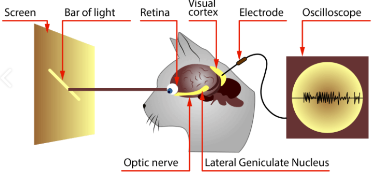

□ 수용장(Receptive Field)의 개념
- **수용장**: 뉴런이 반응하는 시각 필드의 제한된 영역.
- **지역적 수용장**: 많은 뉴런이 작은 국소 수용장을 가짐.
- **수용장 중첩**: 여러 뉴런의 수용장이 중첩되어 시각 필드를 완전히 커버함.

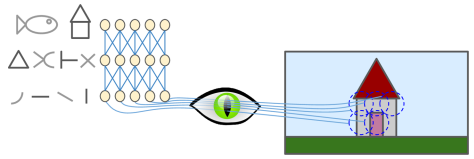

□ 뉴런의 반응 특성
- **선 인식 뉴런**: 특정 **방향의 선**에만 반응하는 뉴런 발견.
  - 예: 어떤 뉴런은 수평선에 반응, 다른 뉴런은 다른 방향의 선에 반응.
- **다양한 크기의 수용장**: 일부 뉴런은 더 큰 수용장을 가지고 복잡한 패턴에 반응.

□ 계층적 뉴런 구조
- **저차원 패턴 → 고차원 패턴**:
  - 고차원 뉴런은 인접한 저차원 뉴런들의 출력을 기반으로 복잡한 패턴을 인식.
- **계층적 구조**:
  - 고차원 뉴런은 저차원 뉴런과 연결되어 시각 필드에서 복잡한 패턴을 감지.

□ 시각 피질 연구의 영향
- **시각 피질 연구**가 **Neocognitron**(1980년) 개발에 영감을 줌.
- Neocognitron은 이후 Convolutional Neural Networks (CNN)로 발전.

□ 합성곱 신경망 연구의 전환점: LeNet-5 아키텍처
- **중요한 발전**: Yann LeCun 등이 1998년 발표한 **LeNet-5**.
- **사용 사례**: 손으로 쓴 수표 번호 인식을 위해 은행에서 널리 사용됨.

□ LeNet-5의 기존 구성 요소
- **Fully connected layers**: 완전 연결 계층.
- **Sigmoid activation functions**: 시그모이드 활성화 함수.

□ LeNet-5의 새로운 구성 요소
- **Convolutional layers**: 입력 이미지에서 특징을 추출하는 계층.
- **Pooling layers**: 공간적 차원을 축소하여 중요한 특징을 강화하는 계층.

□ LeNet-5의 의의
- **기존 신경망의 한계를 극복**: CNN의 기본 아키텍처가 되는 계층 구조 확립.
- **현대 CNN의 기초**: 이미지 처리 및 다양한 컴퓨터 비전 과제에서 CNN이 성공적으로 사용되는 기초 제공.

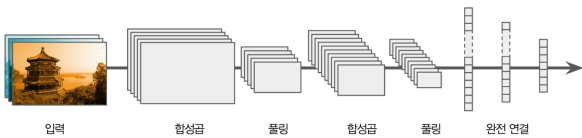

---

※ 왜 이미지 인식 작업에 완전 연결층(fully connected layers)을 가진 Deep Nueral Network(DNN)를 사용하지 않을까?

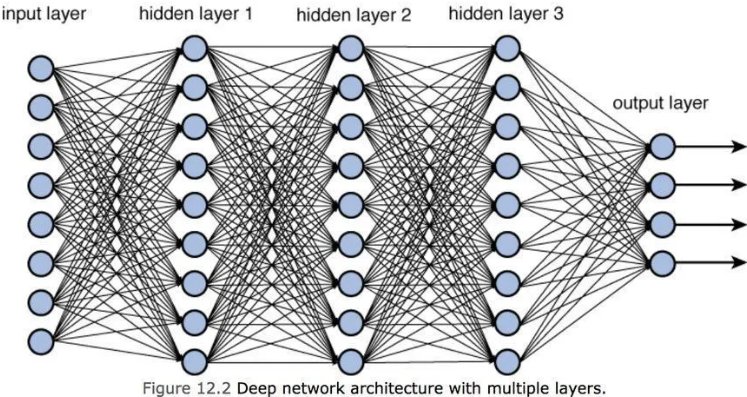

완전 연결 신경망의 한계
- **완전 연결층(fully connected layers)**를 이용한 딥러닝 신경망은 이미지 인식에 적합하지 않음.
- **작은 이미지**에서는 잘 작동(MNIST), 하지만 큰 이미지에서는 비효율적.

매개변수의 폭발적 증가
- 예시: **100x100 픽셀 이미지**의 경우:
  - 1만 개의 픽셀.
  - 첫 번째 층에 1,000개의 뉴런만 있어도 **1,000만 개의 연결** 필요.
  - 이는 정보 전달량을 제한하고, 계산 부담을 극도로 증가시킴.

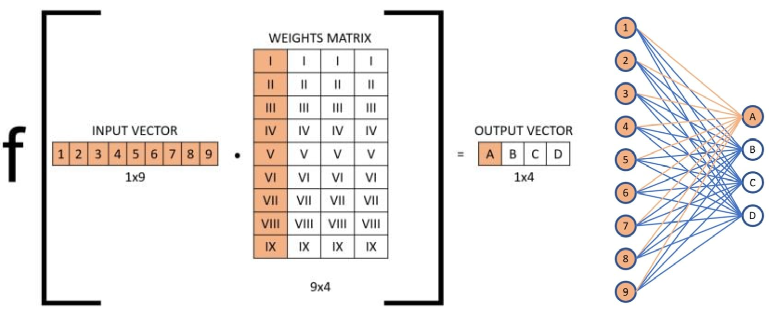


CNN의 해결책
- **부분 연결층(partially connected layers)**:
  - 입력 이미지의 일부 영역만 연결하여 매개변수 수를 줄임.
- **가중치 공유(weight sharing)**:
  - 같은 필터를 여러 위치에 적용해 **파라미터 효율성**을 극대화.

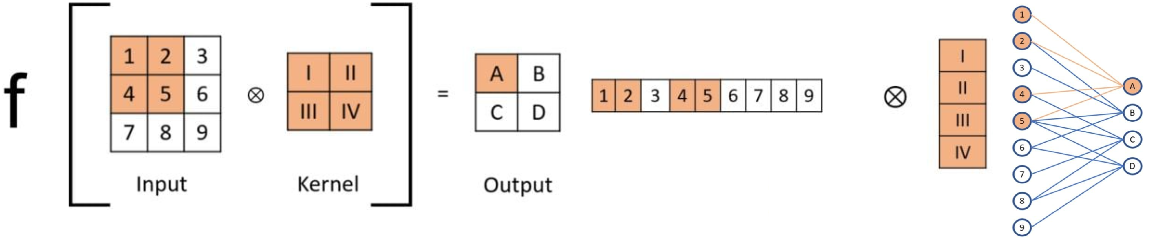

---

# 14.2 CNN의 핵심 구성 요소 - 합성곱 층
- **합성곱 층(Convolutional Layer)**: CNN의 가장 중요한 구성 요소.
- **기존의 완전 연결층과 차이**: 모든 입력 픽셀에 연결되지 않음.

□ 수용장(Receptive Field) 개념
- **첫 번째 합성곱 층**: 뉴런은 **수용장 내의 픽셀**에만 연결됨.
- **두 번째 합성곱 층**: 첫 번째 층에서 작은 직사각형 영역 내의 뉴런들과 연결됨.

□ 계층적 구조
- **저차원 → 고차원 특징**:
  - 첫 번째 숨겨진 층: **작고 저차원**의 특징에 집중.
  - 이후 층들: **더 큰 고차원** 특징들을 조합해 복잡한 패턴을 인식.

□ CNN의 계층 구조와 실제 이미지
- **계층적 특징 학습**: 실제 이미지에서 작은 특징들이 결합되어 복잡한 패턴을 형성.
- **CNN의 강점**: 이런 계층적 구조 덕분에 이미지 인식에 매우 효과적.

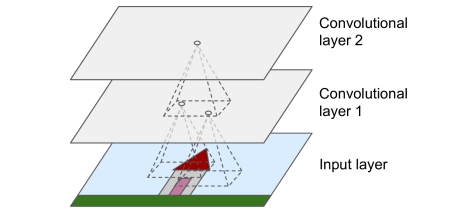

※ 기존 신경망의 구조
- **다층 신경망(Multilayer Neural Networks)**:
  - 층들이 뉴런들의 **일렬(linear)** 배열로 구성됨.
  - **입력 이미지**는 **1차원(1D)**으로 변환되어 신경망에 전달됨.
  
※ CNN에서의 2D 구조
- **CNN**은 각 층을 **2차원(2D)**으로 표현.
- **입력 이미지**의 2D 구조를 유지하여 뉴런들이 **해당 입력**과 더 쉽게 매칭.
- CNN의 장점
  - **입력 이미지의 공간적 정보 보존**: CNN은 2D 구조를 사용하여 이미지의 공간적 패턴을 더 효과적으로 학습.
  - **뉴런과 입력 간의 직관적 매칭**: 뉴런들이 해당하는 입력 픽셀과 직접 연결됨.


※ 재밌는 사실</br>
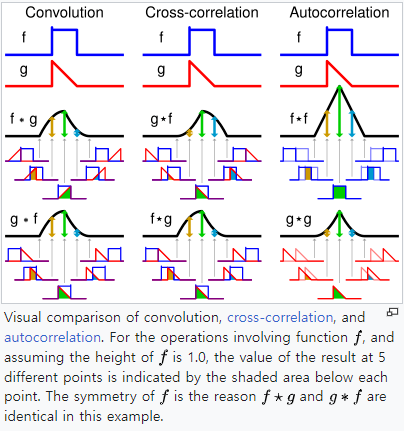

---

□ CNN에서의 뉴런 연결 구조
- 각 층의 뉴런은 이전 층의 **일부 영역**과 연결.
- **행 i, 열 j**에 위치한 뉴런은 이전 층의 **수용장 크기(fh, fw)**에 해당하는 영역과 연결.

□ 수용장의 크기와 연결
- **fh**: 수용장의 높이.
- **fw**: 수용장의 너비.
- 해당 뉴런은 **i ~ i + fh - 1**, **j ~ j + fw - 1** 범위의 뉴런들과 연결.


□ Zero Padding
- **Zero Padding**: 입력 주변에 **0을 추가**하여 다음 층의 크기를 이전 층과 같게 유지.
- **효과**: 입력 이미지의 경계 부분에서도 동일한 크기의 필터 적용 가능.

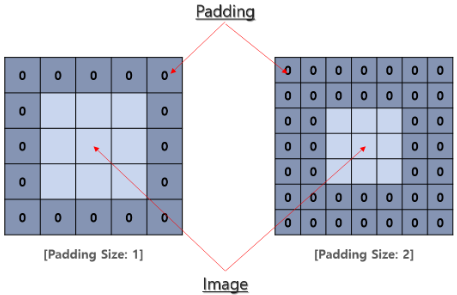

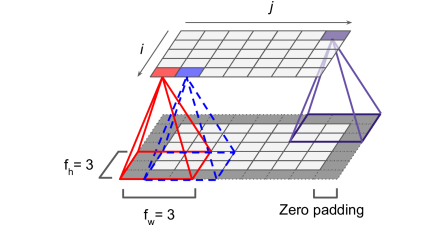

------------

□ CNN에서 입력 층과 작은 층의 연결
- 큰 입력 층을 더 작은 층과 연결하는 방법: **수용장 간격**을 늘려 연결.
- **장점**: 모델의 **계산 복잡도**를 크게 줄임.

□ Stride(보폭)의 개념
- **Stride**: 한 수용장에서 다음 수용장으로 이동할 때의 간격.
- **예시**: 5 × 7 입력 층(제로 패딩 포함)이 3 × 4 층과 연결됨.
  - **3 × 3 수용장** 사용.
  - **Stride = 2**로 이동(수직, 수평 방향 모두 동일한 보폭 적용).

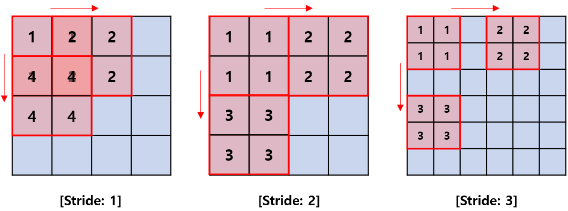

□ Stride 적용 방식
- 상위 층의 **i행, j열**에 있는 뉴런은 이전 층의 **i × sh ~ i × sh + fh - 1**, **j × sw ~ j × sw + fw - 1** 범위의 뉴런들과 연결.
  - **sh**: 수직 보폭 (stride).
  - **sw**: 수평 보폭 (stride).

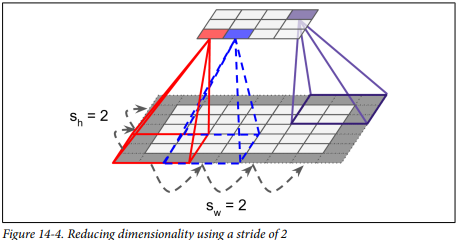

---

### 14.2.1 필터
□ 뉴런의 가중치와 필터
- **뉴런의 가중치**는 수용장 크기의 **작은 이미지**로 표현 가능.
- **필터(filter)** 또는 **합성곱 커널(convolution kernel)**이라 불리는 가중치 집합이 존재.

□ 필터 예시 1 - 세로선 감지 필터
- **세로선 필터**:
  - 7 × 7 행렬로, 중앙 세로줄에만 1이 있고 나머지는 0으로 채워짐.
  - 이 필터를 사용하는 뉴런은 **수용장의 중앙 세로선**에만 반응하고 나머지는 무시.


□ 필터 예시 2 - 가로선 감지 필터
- **가로선 필터**:
  - 7 × 7 행렬로, 중앙 가로줄에만 1이 있고 나머지는 0.
  - 이 필터를 사용하는 뉴런은 **수용장의 중앙 가로선**에만 반응하고 나머지는 무시.

□ CNN의 필터와 특성 맵
- 모든 뉴런이 동일한 필터(예: **세로선 필터**)를 사용하면, 입력 이미지에서 특정 패턴이 강화됨.
- **결과**: 세로선이 강조되고 나머지 부분은 흐릿해짐.

□ 필터 적용 예시
- **세로선 필터 적용**: 세로선이 강조된 출력 이미지 생성.
- **가로선 필터 적용**: 가로선이 강조된 출력 이미지 생성.
- 각각의 필터는 **이미지의 특정 특징**을 강조함.

□ 특성 맵(Feature Map)
- 동일한 필터를 사용하는 뉴런들로 구성된 층은 **특징 맵**을 출력.
- **특징 맵**: 입력 이미지에서 필터가 활성화되는 영역을 강조.

□ 필터 학습
- 필터를 수동으로 정의할 필요 없음.
- **학습 과정에서 합성곱 층이 자동으로 가장 유용한 필터**를 학습.
- 상위 층은 이 필터들을 결합해 **더 복잡한 패턴**을 학습.

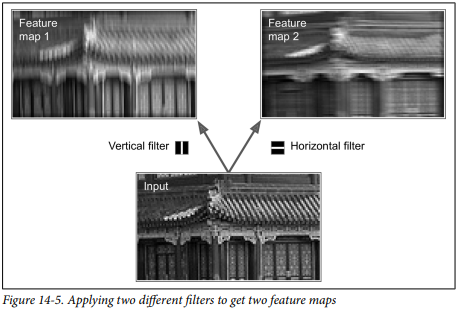

---

### 14.2.2 여러 가지 특성 맵 쌓기

□ 실제 합성곱 층의 구조
- 지금까지는 **2D 합성곱 층**으로 설명했으나, 실제로는 **3D 구조**가 더 정확함.
- **각 필터**는 하나의 **특징 맵(Feature Map)**을 출력하며, 여러 필터가 동시에 사용됨.

□ 필터와 특징 맵
- **각 필터**는 **하나의 특징 맵**을 생성.
- **특징 맵 내의 뉴런**: 같은 가중치와 바이어스를 공유.
- **다른 특징 맵의 뉴런**: 다른 가중치와 바이어스를 사용.

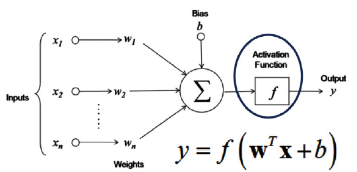

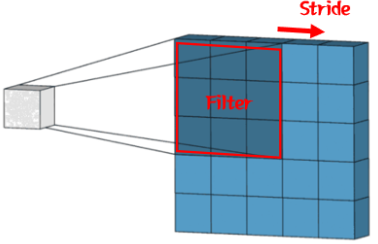

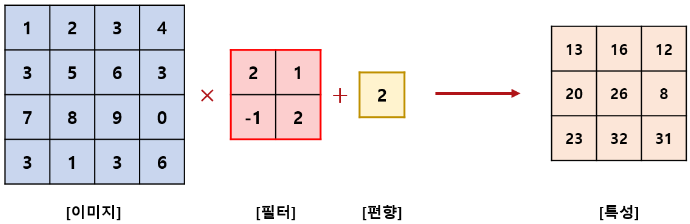

□ 수용장의 확장
- 뉴런의 **수용장**은 이전과 동일하지만, **이전 층의 모든 특징 맵**에 걸쳐 확장됨.
- 이를 통해 **다층 입력**에서 다양한 특징을 감지 가능.

□ 다중 필터의 역할
- **다중 필터**를 동시에 적용하여 입력에서 **여러 특징**을 감지.
- CNN은 다양한 패턴을 학습할 수 있도록 다중 학습 가능한 필터를 사용.

A neuron’s receptive field is the same as described earlier, but it extends across all the previous layers’
feature maps. In short, a convolutional layer simultaneously applies multiple trainable
filters to its inputs, making it capable of detecting multiple features anywhere in its
inputs.

□ CNN과 DNN의 차이점 - 파라미터 공유
- **CNN**: **모든 뉴런**이 동일한 필터(파라미터)를 공유.
- **DNN**: 각 뉴런이 고유한 파라미터를 가짐.

□ CNN의 파라미터 효율성
- **파라미터 수 감소**: CNN은 파라미터를 공유하여 모델의 파라미터 수를 **크게 줄임**.
- **효율적 학습**: 적은 파라미터로도 복잡한 패턴을 인식 가능.

□ 패턴 인식의 차이
- **CNN**: **한 위치에서 학습한 패턴**을 이미지의 **다른 위치에서도 인식** 가능.
- **DNN**: **특정 위치**에서 학습한 패턴은 **그 위치에서만 인식**.

□ CNN의 장점
- **공간 불변성**: CNN은 다양한 위치에서 동일한 패턴을 인식할 수 있어 이미지 처리에 강력.
- **DNN 대비 장점**: CNN의 파라미터 공유로 계산 효율성과 범용성이 높음.

---

※ 입력 이미지: RGB, Greyscale, satellite image(include IR)

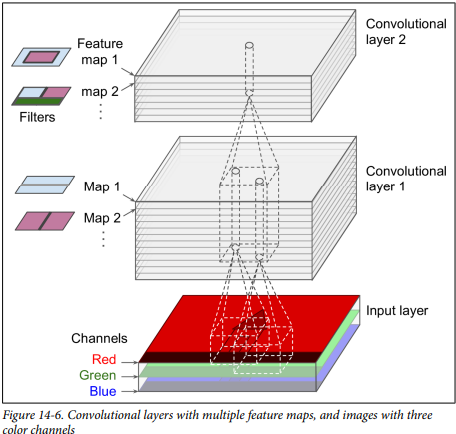

특정 **합성곱 층(l)**의 **특징 맵(k)**에서 i행, j열에 위치한 뉴런은, 이전 층 **(l-1)**의 뉴런들과 연결됩니다. 

이 연결은 이전 층의 i × sh에서 i × sh + fh - 1 행까지, 그리고 j × sw에서 j × sw + fw - 1 열까지 이어집니다.

여기서 sh와 sw는 stride(스트라이드), fh와 fw는 **필터 크기(높이와 너비)**를 나타냅니다.

*만약 i=2, j=3이고, **stride(sh, sw)**가 1, 필터 크기 fh = fw = 3인 경우를 가정하면, 이 뉴런은 이전 층에서 2행부터 4행, 3열부터 5열에 해당하는 뉴런들과 연결

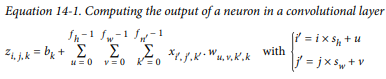

[1, 0, 1]  
[2, 1, 2]  
[1, 0, 1]

[1, -1, 0]  
[0, 1, 1]  
[-1, 0, 1]

(1×1) + (0×-1) + (1×0) + (2×0) + (1×1) + (2×1) + (1×-1) + (0×0) + (1×1) = 1 + 0 + 0 + 0 + 1 + 2 - 1 + 0 + 1 = 4

---

### 14.2.3 케라스로 합성곱 층 구현하기

### → Colab 참고

---

### 14.2.4 메모리 요구사항

□ **합성곱 층의 파라미터 계산 및 연산 요구 사항**

- **층 구성**: **5x5 필터**, **200개의 특징 맵**(150x100 크기), **stride=1**, **"same" 패딩**.
- **입력**: **150x100 RGB 이미지** (3개의 채널).

□ **파라미터 수**:
- 계산 공식: **(필터 높이 × 필터 너비 × 입력 채널 수 + 바이어스) × 필터 수**
  \[
  (5 × 5 × 3 + 1) × 200 = 15,200 파라미터
  \]

□ **계산량**:
- 각 뉴런은 **5 × 5 × 3 = 75개의 입력**에 대한 **가중합**을 계산.
- 모든 뉴런에 대해: **200개의 특징 맵 × 150 × 100 뉴런** = **2억 2천 5백만 개의 float 곱셈**이 필요.

□ **메모리 요구 사항**:
- 각 특징 맵의 뉴런은 **32비트 float**로 저장.
- 한 개의 이미지에 대한 메모리:
  \[
  200 × 150 × 100 × 32 비트 = 9600만 비트 (12MB)
  \]
- **100개의 배치**를 처리할 경우:
  \[
  1.2 GB 메모리 사용
  \]

---

## 14.3 풀링층

□ **풀링 층의 목적**:
   - **서브샘플링**: 입력 이미지의 크기를 줄여 **계산 비용**과 **메모리 사용량**을 줄이고, **과적합(overfitting)**을 방지합니다.
   - **핵심 역할**: 풀링 층은 이전 층의 작은 **수용 영역(receptive field)**에서 정보를 받아들이며, 가중치가 없이 **특정 값(최댓값 또는 평균값)을 취합**합니다.

□ **풀링 연산**:
   - 풀링 층은 **가중치 없이** 입력값을 **집계 함수(aggregation function)**를 통해 처리합니다. 대표적으로 **최대값 풀링(Max Pooling)**과 **평균값 풀링(Mean Pooling)**이 있습니다.
   - **가중치 없음**: 합성곱 층과 달리, 풀링 층은 학습할 **가중치가 존재하지 않음**.

□ **최대값 풀링(Max Pooling) 예시**:
   - **풀링 커널**: 2x2 크기의 커널과 **stride=2**, **패딩 없음**.
   - **최대값 선택**: 각 수용 영역에서 가장 큰 값만 다음 층으로 전달.
   - **예시**: 입력 값 {1, 5, 3, 2} 중 **최대값 5**만 다음 층으로 전달.
   - **결과**: 출력 이미지의 크기는 **입력 이미지의 절반** (패딩 없음).

□ **풀링 층의 이점**:
   - **계산량 감소**: 차원 축소로 인해 계산 비용을 절감.
   - **과적합 방지**: 모델의 복잡성을 줄여 과적합을 방지.
   - **중요한 공간적 특징 보존**: 중요한 활성화 값만 남겨 핵심 정보를 유지.

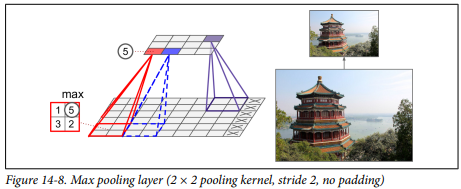

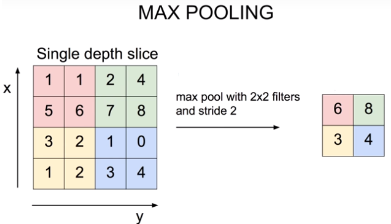

□ 풀링 층 특징
- 입력 이미지의 각 채널에 대해 별도로 작동하므로, 입력의 채널 수는 변하지 않고 유지
- 평행 이동 불변성 (Translation Invariance): 입력 이미지가 **작게 이동**해도 출력 값이 크게 변하지 않음
- **회전 불변성**: Max pooling은 **작은 회전에 대해서도** 어느 정도 불변성
- **스케일 불변성**: 이미지 크기가 조금 변화해도 어느 정도 **크기 불변성**을 제공

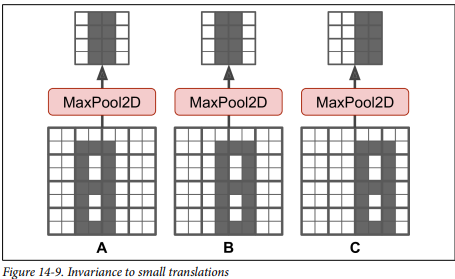

□ 풀링 층 단점
- 파괴적 성질: **2x2 커널**과 **stride=2**를 사용하면, 출력은 입력 크기의 절반으로 줄어들며, **전체 면적은 4배** 작아짐
- 불변성의 비선호: Semantic Segmentation(이미지의 각 픽셀을 분류하는 작업)과 같은 특정 작업에서는 입력 이미지가 **1픽셀 오른쪽으로 이동**하면, 출력 또한 **같이 이동해야함→ 등변성(equivariance) 필요</br>
즉, 입력의 작은 변화가 출력의 작은 변화로 이어져야하는 상황에서는 부적합